<a href="https://colab.research.google.com/github/MWSteams/4590FSP/blob/master/Rapid_Mix_Flocculation_Mechanical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rapid-Mix and Flocculation Mechanical

Authors: Ariel Ben-Sorek, Lynn Li, and Allison Tran

[/Monroe/]: # (See my email for general comments.)

In [1]:
!pip install aguaclara
!pip install molmass

     |████████████████████████████████| 92kB 2.4MB/s 
     |████████████████████████████████| 163kB 8.4MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.1-cp36-none-any.whl size=99466 sha256=d9c750558ea456b693003d16f1536b45900e4742339247a3687d6cfff42eb0b5
  Stored in directory: /root/.cache/pip/wheels/7f/ff/4f/10d76e6a261d392aefbdf6ce8d3d5519e924dc334b102ca49b
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134156 sha256=50e91eab5cd857788beb9f8e7a2b9b71b5c9bad66767aee6ff5a7dc933457004
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint
     |████████████████████████████████| 71kB 2.1MB/s 


In [2]:
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import molmass as mol
!wget https://raw.githubusercontent.com/MWSteams/4590FSP/master/Fairmont.py
import Fairmont as fmt
import math

--2020-05-05 16:01:25--  https://raw.githubusercontent.com/MWSteams/4590FSP/master/Fairmont.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3025 (3.0K) [text/plain]
Saving to: ‘Fairmont.py’

Fairmont.py         100%[===================>]   2.95K  --.-KB/s    in 0s      

2020-05-05 16:01:25 (49.7 MB/s) - ‘Fairmont.py’ saved [3025/3025]



# Task Definition

Our task was to evaluate both processes of mechanical rapid mix and mechanical flocculation, in order to determine the most effective methods for distributing coagulant for mixing and floc formation. In a standard water treatment train, rapid mix occurs between coagulant addition and flocculation, and provides an enhanced method of distributing coagulant evenly through the water. Flocculation is a method to coagulate contaminant particles together for easy removal through sedimentation or filtration, and is an instrumental part of the water treatment train. Our goal is to optimize both treatment processes through modifying parameters such as tank volume, residence time, and flocculator blades, to maximize the amount of contaminant removed through flocculation against maintenance and operation costs.

# Executive Summary 

Regarding both rapid-mix and flocculation we will be using energy dissipation rates as the main constraint to figure out how effectively cogulatant is being distributed in our system as well how effectively the coagulant is forming flocs.

Focusing more specifically on design,  we recommend a pump diffusor as our mechanical rapid-mix mechanism. For mechanical flocculation we will be using rotating blade flocculators. We have not yet determined whether or not we want to implement horizontal or vertical blade flocculators. Regardless of the orientation of the blades, we will compartmentalize the flocculation tank so that a tapered velocity graidnet profile can be imposed. A high to low velocity gradient in subsequent compartments will create dense flocs. It will also reduce the total retention time.

We will be determining the required rapid-mix volumne by it's residence time. The flocculation tank volume will also be termined by it's residence time; however this volume will be more open ended because the residence time is not necessarily constant.

[/Monroe/]: # (Mixing coagulant uniformly with the raw water before splitting the flow into multiple treatment trains might be one of the goals of rapid mix in this plant. I suspect that your design will not be influenced in any way by knowing the contaminant that controls the coagulant dosage because we don't have a physics-based model for the design of the rapid mix. See https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Derivations.html#turbulent-large-scale-eddies for mixing length estimates. Note that you would want to include a safety factor on these equations.)


# Constraints

* Relevant Regulations


* Client Expectations
    * Redundancy plan (at least one backup unit for both rapid mix and floccculation


* Site and Budget
    * Mechcanical mechanisms require a power input which then adds to operation costs
    * Rapid mix mechanical is one of the most energy intensive units in treatment train
    * 200ft*125ft is the proposed rapid mix and flocculation on the plant diagram in the SOW
    

* Process Capabilities Including Process Design Equations
    * Residence time will determine the required volume of rapid-mix


* Ease of Use
    * Static mixers are simple and reliable but they are prone to clogging (MWH)


* Operation Requirements
    * If there are multiple treatment trains, parallel treatment trains must receive the same concentration of coagulant; coagulant must be mixed equally if rapid mix units are before flow splitting
    * Type of coagulant used/dosage
    * The optimal pH for aluminum coagulant nanoparticle formation is between pH of 6.5 and 8.5. Adding coagulant usually reduces pH so somtimes it is necessary to add a base to increase the pH of the raw water
    * pH in the 4.4 to 6 range is optimal for flocculation
    * High temperature accelerates the flocculation process (flocculation may be slower in the winter and therefore operators may need to allow for more time when the temp is colder)


* Maintenance Requirements
    * Needs to be easy to clean
    * Parts that can be easily bought and replaced
    * Vertical shaft rotating blades don't require underwater bearings where as horizonal shaft rotating blades do


[/Monroe/]: # (Quote from Benjamin and Lawler [https://newcatalog.library.cornell.edu/catalog/8516026] page 546: "While much research remains to be done on the interactions of chemicals, paricles, and mixing, the emerging picture at this point is tha ta high degree of turbulence leads to more efficient chemical use for destabilization by adsorption and charge neutralization, whereas destabilization by precipitation is less sensitive to the mixing conditions." My understanding is that drinking water treatment plants use destabilization by precipitation; the only mechanism that we have been able to replicate in our labs here at Cornell. We now recognize that it isn't destabilization, but rather is simply that the coagulant nanoparticles are sticky.)

See [new resources](https://raw.githubusercontent.com/MWSteams/4590FSP/master/resources.md) for information on rapid mix and the Cottonwood plant.


# Physics

$$G=\frac{\Delta v}{\Delta h}$$

where $G$ is the velocity gradient, $\Delta v$ is the difference in velocity between two points on two different streamlines and $\Delta h$ is the distance between the streamlines.

G is a measure of how quickly one point of water along one streamline moves in comparison to another point on a different streamline.

$$\varepsilon = G^2 \nu$$ 

where $\epsilon$ is the energy dissipation rate, $G$ is the velocity gradient, and $\nu$ is the kinematic viscosity of water.

It is hypotheiszed that it's ultimately velocity gradients that transport coagulant nanoparticles to the surface of particles.

$$P = \rho \bar G^2 \nu Q \theta$$ 

where $P$ is power input required, $\rho$ is density of water, $Q$ is the flow rate, and $\theta$ is the hydraulic residence time.

This equation can be used to estimate electrical motor sizing requirements for mechanical rapid mix units.

$$\lambda_\nu = \Pi_{K\nu}\left( \frac{\nu^3}{\varepsilon} \right)^{\frac{1}{4}}$$

where $\lambda_\nu$ is the inner viscous length scale, $\Pi_{K\nu}=5-$, $\nu$ is the kinematic viscosity of water, and $\epsilon$ is the energy dissipation rate.

"At length scales larger than the inner viscous length scale the dominant transport mechanism is by turbulent eddies. At length scales smaller than the inner viscous length scale the dominant transport mechanism is fluid deformation due to shear." (AguaClara) This equations strongly suggests that the coagulant nanoparticles are not transported to the clay surfaces in the short amount of time spent in the rapid mix.

[/Monroe/]: # (The previous equation needs to be combined with an estimate of the diffusion length scale for the coagulant nanoparticles. In any case that equation strongly suggests that the coagulant nanoparticles are not transported to the clay surfaces in the short amount of time spent in the rapid mix.)
[/Lynn/]: # (Added)

[/Monroe/]: # (Another equation is the eddy turnover time
https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Derivations.html#equation-rapid-mix-rm-derivations-38)
[/Ariel/]: # (Added)

We can calculate the volume of water being mixed by assuming the length of the mixing zone is $L=1.5D$, where D is the diameter of the pipe. According to the SOW, the diameter is 87 inches, or 2.2098 meters.
Thus, mixing time $t=\frac{V}{L}$

Next, we can assume the pump flow rate is approximately 3% of plant flow rate, thus
$$Q_{pump} = 26.335 \frac{m^3}{s} * 0.03=0.79 \frac{m^3}{s}$$

Then, we compute hydraulic head by pluggin in mixing energy:
$$E_{mix}= \frac{g*Q_{pump}*\rho*H}{e} $$

Next, we simply solve for viscosity:
$H=\frac{v^2}{2g}$ so $v = \sqrt{2gH}$

Lastly, after solving for hydraulic head, one can solve for the required diameter like so:
$$d= \sqrt\frac{4Q_{pump}}{\pi \nu} $$

# Table Listing Potential Strategies to Meet the Constraints and Treatment Objectives

| strategies | advantages | disadvantages | data needed for decision |
| ---------- | ---------- | ---------- | ---------- |
| Reducing energy used to power mechanical mixers | Lower cost, lower electricity usage | Less power to mixers affects energy dissipation, velocity, residence time, and more | Power usage typical for mechanical rapid mix |
| Modifying coagulant dosage to ensure removal of arsenic | Meet water treatment plant standards for arsenic removal | Rapid mix can be expensive (coagulant and electricity to power mixers) | Coagulant dosage needed to remove certain concentration of arsenic, cost of powering rapid mixers
| Modifying coagulant dosage to ensure even distribution | Increased coagulant will remove more contaminant (arsenic) | Increased coagulant will be more expensive | Type of coagulant used, velocity gradient, ideal dosage, residence time of mixer |
|Horizontal Rotating Blades| More simple compartmentalization, different tapered G values are produced for one particular drive shaft rotational speed| Requires underwater bearings| Flocculation performance|
|Vertical Rotating Blades| Do not require underwater bearings| A much wider diversity of G values within the flocculation basin for a given mean velocity gradient| Flocculation performance|
|Flocculator tank size|Larger tanks result in a longer residence time for flocs|Possible increase in maintenance/operation costs for larger tanks| Flocculation performance using tanks of various sizes|


![](https://github.com/MWSteams/4590FSP/raw/Rapid_Mix_Mechanical/pump1.PNG)

[Pumped Flash Mixer]

# Vendors and Contact Information File

[/Monroe/]: # (Excellent work finding some suppliers)

In [3]:
vendors = pd.read_csv('https://raw.githubusercontent.com/MWSteams/4590FSP/master/vendors.txt',sep='\t')
vendors

,item description,vendor,contact first name,contact last name,vendor website,product info,date of contact,who made the contact,notes
0,plate settlers,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/literaturemedia/...,4/16/2020,Ian Cullings,NaN
1,sludge removal system,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/products/hoseles...,4/16/2020,Ian Cullings,NaN
2,plate settlers,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,https://www.monroeenvironmental.com/water-and-...,4/16/2020,Ian Cullings,NaN
3,sludge removal system,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,http://www.monroeenvironmental.com/water-and-w...,4/16/2020,Ian Cullings,NaN
4,plate settler with hopper,Parkson,still,pending,https://www.parkson.com/,https://www.parkson.com/products/lamella-ecoflow,4/16/2020,Ian Cullings,Includes sloped sludge hopper in design
5,rapid mixer (mech),Dynamix,still,pending,https://www.dynamixinc.com,https://www.dynamixinc.com/industries/waste-wa...,4/16/2020,Lynn Li,NaN
6,rapid mixer (mech),Meurer Research,still,pending,http://www.meurerresearch.com,http://www.meurerresearch.com/products/mixer/,4/16/2020,Lynn Li,NaN
7,rapid mixer (mech),Philadelphia Mixing Solutions,still,pending,https://www.philamixers.com,https://www.philamixers.com/industries/water-w...,4/16/20,Lynn Li,NaN
8,flocculator (mech),Sereco,still,pending,http://www.sereco.it/,https://www.directindustry.com/prod/sereco/pro...,05/04/2020,Lynn Li,NaN


# Shared Assumptions

See this [python file, Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py)

Use this file to hold parameters that are in the SOW or elsewhere that
influence the design of the entire plant. This provides an easy mechanism
for all of us to share the same assumptions. Read the SOW to find sections that relate to your part of the design and enter all pertinent variables into [Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py) and then push those changes to github.

We are creating our model for flocculation on the assumption that the main constituents for removal by flocculation are arsenic and dissolved organic matter. Rapid mixing before flocculation will determine the degree of removal by flocs.

[/Monroe/]: # (Rewrite this now that you recall that rapid mix doesn't remove anything.)

[/Monroe/]: # (You can also create a range of rapid mix volumes, power requirements, and annual operating costs for standard designs for rapid mix units. Those preliminary designs are trivial and will help give insight for goal of reducing the energy footprint of this facility.)

Preliminary assumptions we will be making involve associated costs, such as costs for powering the mixers and operation and maintenance costs for each treatment process. As we begin to develop the code for each process, we will decide on which variables we will be changing and which will be assumed to be fixed.

# Major Decisions

Write several paragraphs describing the major decisions that you will need to make in order to create a design and outline a strategy for how you will obtain the necessary information to make those decisions.

# Next Steps and Challenges

As a next step we will need to:

1) Continue to contact vendors for more specific values regarding cost.

2) Perhaps contact the chemicals team to compare electricity costs of running rapid mix vs coagualant price. 

3) Overall, just refine our code.

# Design



## Design Plan

### Rapid-Mix

**Assumptions**: We will assume a residence time of 1 min for the vertical turbine rapid-mix system. (No need for a residence time for the pump diffusion system)

1. We will optimize length scale in order to find G (conventional design is based on G)
2. Using this G value we will then find the diameter of the conal jet (the flow through each channel will be 1/3 of the overall flow of the plant)
3. Once the jet size is determined we will find the energy required of the pump to produce this jet
4. Finally we will use this energy value to determine operation costs
5. Additionally we can use the power value to find a head height
6. Additionally we can compare and contrast energy requirements for various numbers of rapid mix units (more units = less flow through each)

### Flocculation

**Assumptions**: We will assume a residence time of 20 min for each flocculation unit (each unit will have 3 chambers of decending G values that will each have a residence time of 20/3 min)

1. Set an array for 3 different G values for the 3 chambers of each flocculation unit
2. Using the incoming turbidity, flow, and residence time we will calculate the energy requirement (the flow through each channel will be 1/3 of the overall flow of the plant)

In [0]:
## Givens
#print('The average flow to be treated at Fairmont is',fmt.q_ave.to(u.Mgal/u.day),'or')
#print('The maximum flow to be treated at Fairmont is',fmt.q_max.to(u.Mgal/u.day))
specific_energy = (fmt.electricity_power/fmt.q_ave).to(u.J/u.L)
temp = 15 * u.degC
specific_potential_energy = (specific_energy / u.gravity / ac.density_water(temp)).to(u.m)
fsp_flow = fmt.q_max.to(u.Mgal/u.day)

#print('The average amount of energy used per liter of water is expected to be',specific_energy,'or',specific_potential_energy,'of potential energy')

# Adjusting pH (operating at an optimum pOH mitigates the need to shift optimum pH based on temp)
#pkW = (0.01760*temp.to(u.degK))+(4470.99/temp.to(u.degK))-6.0875
#pH + pOH = pKW

## Constants (random by Monroe)
fmt.n_rm_mech #4 units (one for redunancy)
fmt.L_rm_mech #3m
fmt.W_rm_mech #3m

fmt.n_floc_mech #4 units
fmt.L_floc_mech #10m
fmt.W_floc_mech #10m

elec_price_la = 0.1173*((u.USD)/(u.kW*u.hr)) #average industrial electricity rate in Los Angeles

In [8]:
# Rapid-Mix Mechanical

# Diameter of rapid mix injection pipe given in SOW
diameter_rm_mech_pipe = 87 * u.inch
length_in_rm = 1.5 * diameter_rm_mech_pipe

volume_rm_mech = np.pi*diameter_rm_mech_pipe**2*length_in_rm/4
injection_time = (volume_rm_mech) / fsp_flow

# We can assume the pump flow rate is approximately 3% of plant flow rate,
# and we can divide by the number of treatment trains later to get a full picture
rm_mech_pump_flow_ratio = 0.03
rm_mech_pump_flow = fsp_flow * rm_mech_pump_flow_ratio

# Compute hydraulic head by plugging in mixing energy assuming pump efficiency = 1:
# Temporary velocity gradient for now to verify equations work
rm_velocity_gradient = 700 / u.s
rm_mech_pump_energy = rm_velocity_gradient**2 * ac.viscosity_dynamic_water(temp)* volume_rm_mech
print(rm_mech_pump_energy.to(u.kW))
efficiency_rm_mech_pump = 1
hydraulic_head_rm_mech = rm_mech_pump_energy * efficiency_rm_mech_pump / (u.gravity  * ac.density_water(temp) * rm_mech_pump_flow)
print(hydraulic_head_rm_mech.to(u.m))
# Next, we simply solve for viscosity:
viscosity_kinematic_rm_mech = np.sqrt(2*u.gravity*hydraulic_head_rm_mech)

# Lastly, after solving for hydraulic head, solve for the required diameter like so:
diamter_rm_mech_injection = np.sqrt(4*rm_mech_pump_flow/(np.pi*viscosity_kinematic_rm_mech))
print('The diameter of the jet orifice is',diamter_rm_mech_injection.to(u.centimeter) )

# Mass Conservation
area_rm_mech_injection = diamter_rm_mech_injection**2 * np.pi / 4
velocity_rm_injection = (rm_mech_pump_flow / area_rm_mech_injection).to(u.m/u.s)
print('The velocity from the jet is',velocity_rm_injection)

# Operation Cost
daily_elec_rm_mech = (rm_mech_pump_energy*(24*u.hr)).to(u.kW*u.hr)
daily_cost_rm_mech = daily_elec_rm_mech*elec_price_la
print('The daily electricity cost to run rapid mix is', daily_cost_rm_mech, '.')

7.076 kilowatt
1.181 meter
The diameter of the jet orifice is 40.23 centimeter
The velocity from the jet is 4.812 meter / second
The daily electricity cost to run rapid mix is 19.92 dollar .


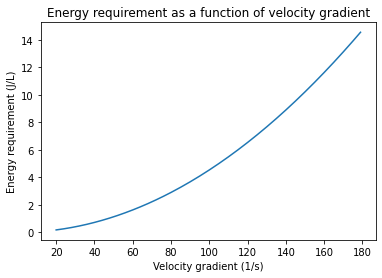

In [6]:
# Flocculation Mechanical

# The velocity gradient G will depend on the incoming turbidity of the water. We wanted to create a graph of the
# energy requirement required to meet the corresponding velocity gradient in the mechanical flocculator. We were
# given a range of 20-180 (1/s) for the velocity gradient, depending on the turbidity of the water. We also used
# given parameters such as the residence time for each of 3 flocculation unit, the incoming flow rate of the
# water, and the temperature of the water in the flocculator. 

# assuming the residence time for each flocculation unit
residence_time_floc_mech = (20/3)*u.min 

# Given parameters
floc_flow = fsp_flow/3
floc_temp = 15 * u.degC

# Creating an array with the range of velocity gradient values 
G_mech = []

for x in range(20,180):
  G_mech.append(x)

G_mech = G_mech * (1/u.s)

# Solving for an array of Gt values given the velocity gradients
Gt_mech = []

for x in range(len(G_mech)):
  Gt_mech.append((G_mech[x] * residence_time_floc_mech).to(u.dimensionless))

# Calculating the equivalent average energy dissipation rate for the range of velocity gradients
energy_dis_rate = []

for x in range(len(G_mech)):
  energy_dis_rate.append((G_mech[x]**2 * ac.viscosity_kinematic_water(floc_temp)).to(u.mW/u.kg))

# Calculating power requirement for the mechanical flocculators 
power_floc = []

def power_floc_shaft(Q,G,t,temp):
  return ((G**2 * Q * t * ac.viscosity_dynamic_water(temp)).to(u.kW))

for x in range(len(G_mech)):
  power_floc.append(power_floc_shaft(floc_flow, G_mech[x], residence_time_floc_mech, floc_temp))

# Solving for the energy requirement given the power of the flocculator 
def energy_mech(Q,G,t,temp):
  return(((power_floc_shaft(Q,G,t,temp))/Q).to(u.J/u.L))

energy_req = []

for x in range(len(G_mech)):
  energy_req.append((energy_mech(floc_flow, G_mech[x], residence_time_floc_mech, floc_temp)).magnitude)

# Plot the energy requirement as a function of the possible velocity gradient values
plt.plot(G_mech, energy_req)
plt.xlabel('Velocity gradient (1/s)') 
plt.ylabel('Energy requirement (J/L)') 
plt.title('Energy requirement as a function of velocity gradient') 
plt.show()

# References

https://aguaclara.github.io/Textbook/Rapid_Mix

https://education.seattlepi.com/flocculation-wastewater-4866.html

https://www.iwapublishing.com/news/coagulation-and-flocculation-water-and-wastewater-treatment

https://www.electricitylocal.com/states/california/los-angeles/